In [337]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow.keras as keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.losses import CategoricalCrossentropy




# sources
# bsc-coding-five/image_preprocessing/Image\Processing.ipynb 
# https://medium.com/@oluyaled/image-classification-with-tensorflow-and-keras-dd5eae8906ca
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# https://www.tensorflow.org/tutorials/load_data/images
#https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
#https://numpy.org/doc/stable/reference/generated/numpy.max.html
#https://www.tensorflow.org/guide/keras/sequential_model
#https://keras.io/api/data_loading/image/
#https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/
#https://forums.fast.ai/t/why-using-np-argmax-for-getting-predictions/14937

In [338]:
images = 'images'

In [3]:
num_skipped = 0 #to delete corrupted imgs
for root, dirs, files in os.walk('images'):
  path = root.split(os.sep)

  for file in files:
    _, extension = os.path.splitext(file)

    if extension == ".jpg" or ".jpeg":
      filepath = root + "/" + file

      try:
        fobj = open(filepath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(1)
      finally:
        fobj.close()

      if not is_jfif:
        num_skipped += 1
        # Delete corrupted image
        os.remove(filepath)

print("Deleted %d images" % num_skipped)

Deleted 1 images


In [339]:
## DO NOT REFRESH THE TOP CELL!!!!!!!! had issues that created duplicates
image_size = (180, 180)
batch_size = 32



#preprocess the dataset to help the data train more accurately 
datagen = ImageDataGenerator(
    rotation_range=20,   
     shear_range=0.2,       
    zoom_range=0.2,  
    width_shift_range=0.2,  
    height_shift_range=0.2,     
    horizontal_flip=True,   
    fill_mode='nearest'    
)


train_ds, val_ds = tf.keras.utils.image_dataset_from_directory( #preferred to put my training and validation in one place to stop confusion when looking back on code
    "images",
    validation_split=0.2,
    subset="both",
    seed=137,
    image_size=image_size,
    batch_size=batch_size,
)

Found 607 files belonging to 4 classes.
Using 486 files for training.
Using 121 files for validation.


In [340]:
class_names = train_ds.class_names
print(class_names)

['bicycles', 'cars', 'deer', 'mountains']


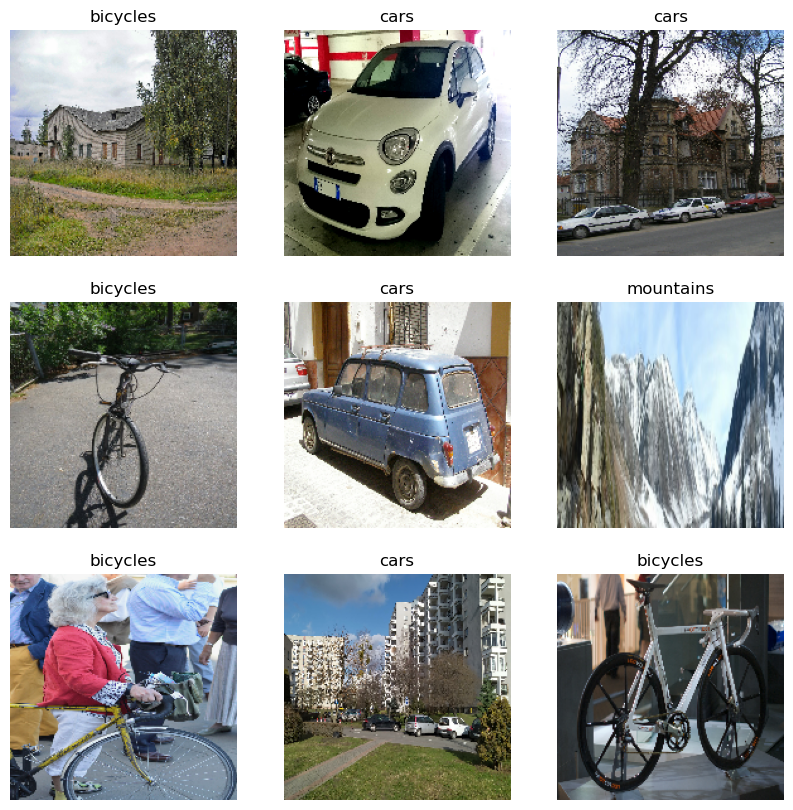

In [341]:
plt.figure(figsize=(10, 10)) 
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) #3x3
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [325]:
#to know what shape the data is and batch
print(batch_data.shape)
print(batch_labels.shape)

(32, 180, 180, 3)
(32,)


In [332]:
no_classes = 4 #defined the no. of classes in the "class_names"



model = tf.keras.Sequential([

  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), #added the shape i found using (batch_data.shape)
    #2nd bracket are for the the size of pooling window  (3,3)
    #i also used relu activation fuctions, helps get details in the images
  tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)), 
     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),#to speed training, without this found it to be really slow
     tf.keras.layers.MaxPooling2D((2, 2)),
   tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), #i also used relu activation fuctions, helps get details in the images
  tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'), #experimented by adding more layers to get a better abstraction, played around with different number until it worked. added 512 as the last layer since itll make the model and predictions accurate and detailed which ending up working with this dataset.
    tf.keras.layers.Dropout(0.5), # for regularisation to stop overfittng, 0.5 means drops 50%
    tf.keras.layers.Dense(no_classes, activation='softmax')     #softmax at the end to get best possibility of accuracy
])


In [330]:
model.compile(
    optimizer='adam',
loss="sparse_categorical_crossentropy", #was having problems with just 'categorical_crossentropy' so i used sparse that i found on the image classification documention on keras
    metrics=['accuracy']
)

In [303]:
model.fit(train_ds, epochs=15, validation_data= val_ds) # was using 10 epochs first, but was having accuracy problems so I inscreased it to 15 to make the model more accurate. 

Epoch 1/15
16/16 [==============================] - 63s 3s/step - loss: 0.7737 - accuracy: 0.8025 - val_loss: 4.8579 - val_accuracy: 0.6281
Epoch 2/15
16/16 [==============================] - 62s 3s/step - loss: 0.6629 - accuracy: 0.8457 - val_loss: 2.9634 - val_accuracy: 0.6364
Epoch 3/15
16/16 [==============================] - 72s 3s/step - loss: 0.6117 - accuracy: 0.8539 - val_loss: 2.5474 - val_accuracy: 0.6612
Epoch 4/15
16/16 [==============================] - 61s 3s/step - loss: 0.4044 - accuracy: 0.8868 - val_loss: 2.5142 - val_accuracy: 0.6198
Epoch 5/15
16/16 [==============================] - 68s 3s/step - loss: 0.2700 - accuracy: 0.9259 - val_loss: 1.9610 - val_accuracy: 0.6612
Epoch 6/15
16/16 [==============================] - 76s 4s/step - loss: 0.3815 - accuracy: 0.9136 - val_loss: 2.1428 - val_accuracy: 0.7438
Epoch 7/15
16/16 [==============================] - 62s 3s/step - loss: 0.3054 - accuracy: 0.9156 - val_loss: 2.0587 - val_accuracy: 0.7190
Epoch 8/15
16/16 [==

In [304]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_161 (Conv2D)         (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_16 (Ba  (None, 178, 178, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_159 (MaxPool  (None, 89, 89, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_162 (Conv2D)         (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_17 (Ba  (None, 87, 87, 64)        256       
 tchNormalization)                                               
                                                     

In [305]:
model.save("./model7/") #saving the trained model 
#everything is good from here , having issues with predicting new images, resolved it by updating my model and adding more epochs to get a better accuracy

INFO:tensorflow:Assets written to: ./model7/assets


INFO:tensorflow:Assets written to: ./model7/assets


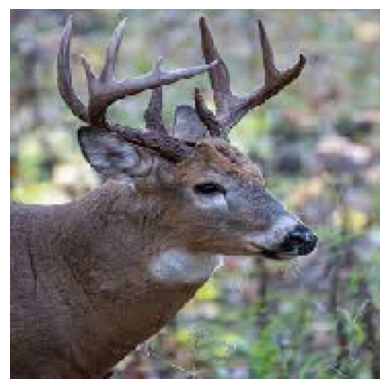

1/1 [==============================] - 0s 198ms/step
The Predicted Class is: deer
The Predicted Confidence is : 0.38


In [364]:
model = keras.models.load_model('model7')
labels = class_names #list mentioned above 

# preprocess the new images
img_pth = 'testmodelimages/deertest.jpeg' 
img = keras.preprocessing.image.load_img(img_pth, target_size=(180,180,3))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  


#to preview imgs
plt.axis('off')
plt.imshow(img)
plt.show()

predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_confidence = np.max(predictions) #reliability of the accuracy

print(f'The Predicted Class is: {labels[predicted_class_index]}')
print(f'The Predicted Confidence is : {predicted_confidence:.2f}')